In [2]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


(None,
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
 0          1    15634602  Hargrave          619    France  Female  42.0   
 1          2    15647311      Hill          608     Spain  Female  41.0   
 2          3    15619304      Onio          502    France  Female  42.0   
 3          4    15701354      Boni          699    France  Female  39.0   
 4          5    15737888  Mitchell          850     Spain  Female  43.0   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1        1.0             1.0   
 1       1   83807.86              1        0.0             1.0   
 2       8  159660.80              3        1.0             0.0   
 3       1       0.00              2        0.0             0.0   
 4       2  125510.82              1        NaN             1.0   
 
    EstimatedSalary  Exited  
 0        101348.88       1  
 1        112542.58       0  
 2        113931.57       1  
 3         

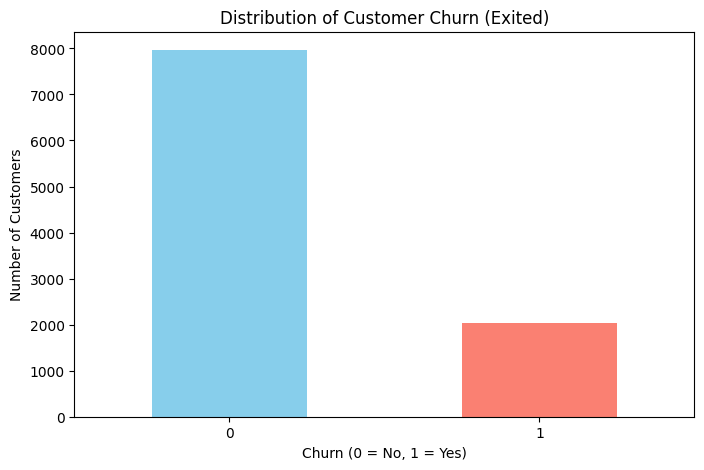

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,100083.331145
std,96.661615,10.487200,2.891973,62393.474144,0.581639,57508.117802
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50983.750000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100185.240000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,149383.652500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [3]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable (Exited)
plt.figure(figsize=(8, 5))
data['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Customer Churn (Exited)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Basic statistics of key numerical features
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
numerical_summary = data[numerical_columns].describe()

numerical_summary


In [4]:
# Displaying dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
# Dropping unnecessary columns
data_cleaned = data.drop(columns=["CustomerId", "RowNumber", "Surname"])

# Confirming changes
data_cleaned.info()

# Checking for missing values in the dataset
missing_values = data_cleaned.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


,0
Geography,1
Age,1
HasCrCard,1
IsActiveMember,1


In [6]:
# Dropping rows with missing values
data_cleaned = data_cleaned.dropna()

# Confirming that there are no more missing values
missing_values_after = data_cleaned.isnull().sum()

missing_values_after


,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = data_cleaned.drop(columns=["Exited"])
y = data_cleaned["Exited"]

# Identify categorical and numerical columns
categorical_columns = ["Geography", "Gender"]
numerical_columns = [col for col in X.columns if col not in categorical_columns]

# Preprocessing pipeline: OneHotEncoding for categorical, Scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(drop="first"), categorical_columns)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Confirm the shape of the transformed datasets
X_train_preprocessed.shape, X_test_preprocessed.shape


((7998, 11), (2000, 11))

Explore feature importance for better insights.



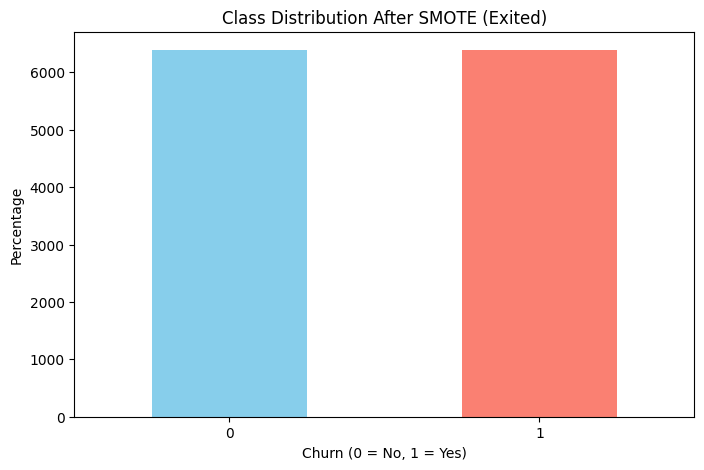

,proportion
Exited,
0,50.0
1,50.0


In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Check class distribution after SMOTE
resampled_class_balance = y_resampled.value_counts(normalize=True) * 100

# Plot the new class distribution
plt.figure(figsize=(8, 5))
y_resampled.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE (Exited)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

# Display the new class balance
resampled_class_balance


tran a model now



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Assuming `X_train_preprocessed`, `y_train`, and `X_test_preprocessed` are already prepared
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Train XGBoost
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, n_estimators=50, max_depth=3, learning_rate=0.1)
xgb_model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_smote_xgb = xgb_model_smote.predict(X_test_preprocessed)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_smote_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1572
           1       0.58      0.67      0.62       428

    accuracy                           0.83      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.84      0.83      0.83      2000

Confusion Matrix:
 [[1368  204]
 [ 141  287]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:46:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


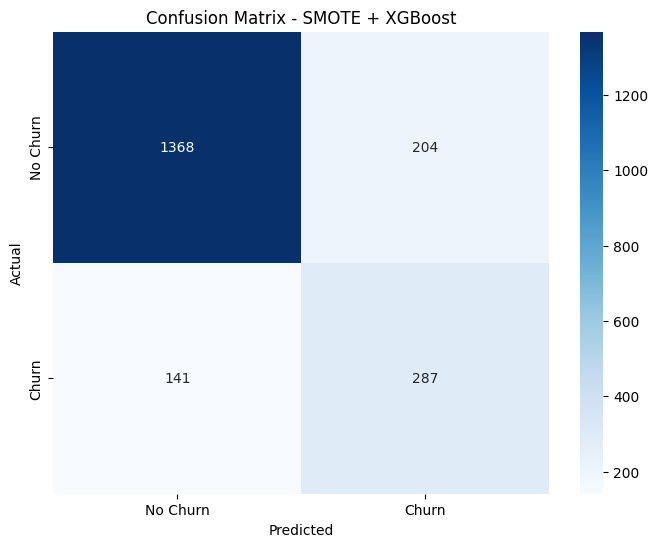

In [20]:
# Plot the confusion matrix for the SMOTE-trained XGBoost model
import seaborn as sns

confusion_matrix_smote_xgb = confusion_matrix(y_test, y_pred_smote_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_smote_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - SMOTE + XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
